# Dog Breed Classifier
## Deep Learning (Supervised): Computer Vision, Classification
## Python, TensorFlow, Keras, Convolutional Neural Network (CNN)

---
### Description

This project will develop an algorithm that could be used as part of a mobile or web app as a dog breed classifier. The code will accept any user-supplied image as input. If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling. In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN model that infers dog breed. There are many points of possible failure, and no perfect algorithm exists.  

### This algorithm accepts a file path to an image and first determines...
 - **If the image contains a human, dog, or neither, then...**
   - **if a dog is detected in the image, returns the predicted breed.**
   - **if a human is detected in the image, returns the resembling dog breed.**
   - **if neither is detected in the image, provides output that indicates an error.**

## Table of Contents

* [Step 0](#step0): **Import Human Face and Dog Breed Datasets** 
* [Step 1](#step1): **Create Human Face Detector -- Using Haar Cascades (OpenCV)** 
* [Step 2](#step2): **Create Dog Detector -- Using ResNet-50 Pre-trained with ImageNet**
* [Step 3](#step3): **Dog Breed Classifer -- Method 1: Create and Train CNN from Scratch**
* [Step 4](#step4): **Dog Breed Classifer -- Method 2: Transfer Learning (VGG-16)**
* [Step 5](#step5): **Dog Breed Classifer -- Method 3: Transfer Learning (Xception)**
* [Step 6](#step6): **Write your Algorithm -- Dog Detector and Breed Classifier**
* [Step 7](#step7): **Test Your Algorithm -- Dog Detector and Breed Classifier**

### References
- [Learned-Miller (2007), Labeled Faces in the Wild: A Survey](https://people.cs.umass.edu/~elm/papers/LFW_survey.pdf)
- [Liu (2012), Dog Breed Classification Using Part Localization](http://people.eecs.berkeley.edu/~kanazawa/papers/eccv2012_dog_final.pdf)


- [OpenCV: Face Detection using Haar Cascades](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)
- [OpenCV: Pre-trained Face Detectors](https://github.com/opencv/opencv/tree/master/data/haarcascades)


- [Deng (2009), ImageNet: A Large-Scale Hierarchical Image Database](http://www.image-net.org/papers/imagenet_cvpr09.pdf)
- [ImageNet: 1000 categories with 14M images](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) 


- [Xu (2017), An Intuitive Guide to Deep Network Architectures](https://towardsdatascience.com/an-intuitive-guide-to-deep-network-architectures-65fdc477db41)


- [Yu (2011), Improved Bottleneck Features Using Pretrained Deep Neural Networks](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Bottleneck-Interspeech2011-pub.pdf)
- [Chollet (2016), Augmenting Data: Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)



- [Zhang (2015), ResNet-50: Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

- [Simonyan (2015), VGG-19: Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/pdf/1409.1556.pdf)


- [Lin (2014), Network in Network](https://arxiv.org/pdf/1312.4400v3.pdf)
- [Vanhoucke (2014), GoogleNet : Going Deeper with Convolutions](https://arxiv.org/pdf/1409.4842v1.pdf)
- [Szegedy (2015), Inception-V3: Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/pdf/1512.00567v1.pdf)
- [Chollet (2017), Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/pdf/1610.02357.pdf)


### Datasets
- [Human Faces -- Labeled Faces in the Wild](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip): -- unzip to ./lfw
- [Dog Breeds -- Columbia Dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) -- unzip to ./dogImages


###  Bottleneck Features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) -- unzip to ./bottleneck_features
- [VGG-16](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz) -- unzip to ./bottleneck_features 
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) -- unzip to ./bottleneck_features 
- [InceptionV3](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) -- unzip to ./bottleneck_features 
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) -- unzip to ./bottleneck_features 


---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog and Human Datasets
- [Human Faces -- Labeled Faces in the Wild](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip): -- unzip to ./lfw
- [Dog Breeds -- Columbia Dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) -- unzip to ./dogImages

In [2]:
import pandas as pd

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions
from keras.applications import resnet50 
#from keras.applications.vgg19 import VGG16, preprocess_input
#from keras.applications.vgg19 import VGG19, preprocess_input
#from keras.applications.inception_v3 import InceptionV3, preprocess_input

import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  

from keras.utils import np_utils
from sklearn.datasets import load_files     
import numpy as np
from glob import glob
import random
from tqdm import tqdm
from keras.preprocessing import image   

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Lambda
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 

import sys
print(sys.version)

from tensorflow.python.client import device_lib
print (device_lib.list_local_devices()[1].physical_device_desc,device_lib.list_local_devices()[1].name)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1 /device:GPU:0


- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels
- `human_files`- numpy array that stores file paths for a dataset of human images

In [3]:
%%time

def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]
dog_breeds = len(dog_names)

print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

random.seed(8675309)
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

human_files_short = human_files[:100] # do not modify
dog_files_short = train_files[:100] # do not modify

print('\n\nThere are %d total human images.' % len(human_files),'\n')

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


There are 13233 total human images. 

Wall time: 11.5 s


---
<a id='step1'></a>
## Step 1: Create Face Detector -- Using Haar Cascades (OpenCV)
- [OpenCV: Face Detection using Haar Cascadesl](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)
- [OpenCV: Pre-trained Face Detectors](https://github.com/opencv/opencv/tree/master/data/haarcascades)


- `faces` is a numpy array of detected faces, where each row corresponds to a detected face. 
- Each detected face in `faces` is a 1D array with four entries (`x`, `y`, `w`, `h`) that specifies the bounding box of the detected face.
- `x` and `y` specify the horizontal and vertical positions of the top left corner of the bounding box. 
- `w` and `h` specify the width and height of the box.

In [4]:
def find_faces(image):
    img = cv2.imread(image) # load color (BGR) image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert BGR image to grayscale
    faces = face_cascade.detectMultiScale(gray) # find faces in image
    return faces, img

def show_face_image(faces, img):
    print('Number of Human Faces detected:', len(faces))
    for (x,y,w,h) in faces: # get bounding box for each detected face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # add bounding box to color image
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR image to RGB for plotting
    plt.imshow(cv_rgb) # display the image, along with bounding box
    plt.show()

haar_file = 'haarcascades/haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier(haar_file)
print ('Haar Cascade Algorithm:', haar_file)

Haar Cascade Algorithm: haarcascades/haarcascade_frontalface_alt.xml


Number of Human Faces detected: 1


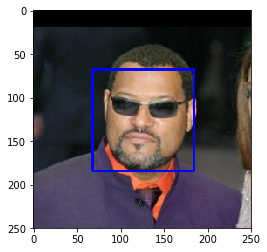

Wall time: 1.27 s


In [5]:
%%time

faces, img = find_faces(human_files[3])
show_face_image(faces, img) 

Number of Human Faces detected: 4


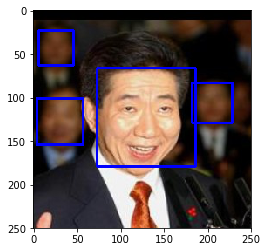

In [6]:
def find_max_number_of_faces():
    max_faces = [0,0,0,0]
    for k in range(400): 
        faces, img = find_faces(human_files[k])
        if len(faces) > max_faces[0]: max_faces = [len(faces), k, faces, img]
    show_face_image(max_faces[2], max_faces[3])  
    
find_max_number_of_faces()

Number of Human Faces detected: 1


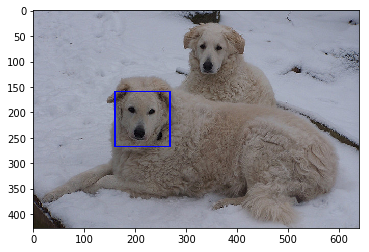

In [7]:
def find_false_positive_human_face():
    for k in range(100):
        faces, img = find_faces(train_files[k])
        if len(faces) == 1: break
    show_face_image(faces, img)   
    
find_false_positive_human_face()

### Face Detector : Performance of the Algorithm

In [8]:
%%time

def face_detector(img_path, face_cascade): # returns "True" if face is detected in image in img_path
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

print ('Haar Cascade Algorithm:', haar_file,'\n')

faces_vfunc = np.vectorize(face_detector) # Vectorize the face dectector function
human_faces = faces_vfunc(human_files_short, face_cascade) # Detect faces in both sets
dog_faces = faces_vfunc(dog_files_short, face_cascade) # Detect faces in both sets

percent_human = (sum(human_faces)/len(human_faces))*100
percent_dog = (sum(dog_faces)/len(dog_faces))*100
print('Faces detected in {:.2f}% of the sample human dataset.'.format(percent_human))
print('Faces detected in {:.2f}% of the sample dog dataset.'.format(percent_dog),'\n')

Haar Cascade Algorithm: haarcascades/haarcascade_frontalface_alt.xml 

Faces detected in 99.00% of the sample human dataset.
Faces detected in 12.00% of the sample dog dataset. 

Wall time: 10.2 s


### Face Detector: Assessing the Performance

- Human faces have been detected in 100% of the first 100 images in `human_files` 
- Human faces have been detected in 12% of the first 100 images in `dog_files`

### Question 2: Making the Face Detector More Robust
The Haar Cascade works very well when human faces are clearly presented. One way to build a more robust algorithm that does not require clearly presented human faces would be to train a CNN with augmented data. Augmenting creates additional training data by rotating, shifting, rescaling, shearing, zooming and flipping the original dataset. 

### Face Detector: Experimenting with Different Haar Cascade Algorithms

In [9]:
%%time

if (0):
    haar_files = np.array(glob("haarcascades/*"))
    for haar_file in haar_files[:8]:
        face_cascade = cv2.CascadeClassifier(haar_file)
    
        faces_vfunc = np.vectorize(face_detector) # Vectorize the face dectector function
        human_faces = faces_vfunc(human_files_short, face_cascade) # Detect faces in both sets
        dog_faces = faces_vfunc(dog_files_short, face_cascade) # Detect faces in both sets

        print ('---\nHaar Cascade Algorithm:', haar_file,'\n')
        percent_human = (sum(human_faces)/len(human_faces))*100
        percent_dog = (sum(dog_faces)/len(dog_faces))*100
        print('Faces detected in {:.2f}% of the sample human dataset.'.format(percent_human))
        print('Faces detected in {:.2f}% of the sample dog dataset.'.format(percent_dog),'\n')

Wall time: 0 ns


---
<a id='step2'></a>
## Step 2: Create Dog Detector -- Using ResNet-50 Pre-trained with ImageNet
- [ResNet-50: Deep Residual Learning for Image Recognition (2015)](https://arxiv.org/pdf/1512.03385.pdf)
- [ImageNet: A Large-Scale Hierarchical Image Database (2009)](http://www.image-net.org/papers/imagenet_cvpr09.pdf)
- [ImageNet: 1000 categories with 14M images](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) 

### TensorFlow and Keras

TensorFlow and Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape:

$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels})
$

- `nb_samples` corresponds to the total number of images (or samples)
- `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image

### Pre-process the Data

The `path_to_tensor` function takes a string-valued file path to a color image and returns a 4D tensor:

$
Tensor Shape = (1, 224, 224, 3)
$

- The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels. 
- Next, the image is converted to an array, which is then resized to a 4D tensor.

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape:

$
Tensor Shape = (\text{nb_samples}, 224, 224, 3)
$

### Keras Preprocessing
- Keras does the following for all pretrained models using: [`preprocess_input`](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py)
  - RGB is converted to BGR by reordering the channels
  - Normalization: subtracts mean value, calc from all pixels in all images (in ImageNet), from every pixel in every image

$
Mean Pixel Value = [103.939, 116.779, 123.68]
$

In [10]:
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(img_size[0], img_size[1])) 
    x = image.img_to_array(img) # convert image to 3D tensor with shape (224, 224, 3)
    return np.expand_dims(x, axis=0) # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) 

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors).astype('float32')/255 

img_size = (224, 224, 3)
img_path = human_files[3]

img = cv2.imread(img_path)
print ('Shape of Image (input):',img.shape)

img = path_to_tensor(img_path)
print ('Shape of Tensor (output):',img.shape)

Shape of Image (input): (250, 250, 3)
Shape of Tensor (output): (1, 224, 224, 3)


### ResNet-50 Pre-trained with ImageNet

In [11]:
ResNet50_model = ResNet50(weights='imagenet')

### Making Predictions with ResNet-50

In [12]:
def ResNet50_predict_labels(img_path): # returns prediction vector for image located at img_path
    img = resnet50.preprocess_input(path_to_tensor(img_path)) # convert to BGR and Normalization
    predict = ResNet50_model.predict(img) # vector of probabilities for each category
    return np.argmax(predict)

### Dog Detector : Performance of the Algorithm

In [13]:
%%time

def dog_detector(img_path): ### returns "True" if a dog is detected in the image stored at img_path
    prediction = ResNet50_predict_labels(img_path)
    #print (prediction)
    return ((prediction <= 268) & (prediction >= 151)) 

dog_vfunc = np.vectorize(dog_detector) # Vectorize the dog dectector function
human_dogs = dog_vfunc(human_files_short) # Detect dogs in both sets
dog_dogs = dog_vfunc(dog_files_short) # Detect dogs in both sets

print('Dogs detected in {:.2f}% of the sample human dataset.'.format((sum(human_dogs)/len(human_dogs))*100))
print('Dogs detected in {:.2f}% of the sample dog dataset.'.format((sum(dog_dogs)/len(dog_dogs))*100),'\n')

Dogs detected in 1.00% of the sample human dataset.
Dogs detected in 100.00% of the sample dog dataset. 

Wall time: 6.03 s


### Dog Detector: Assessing the Performance

- Dogs have been detected in 1% of the first 100 images in `human_files` 
- Dogs have been detected in 100% of the first 100 images in `dog_files`

---
<a id='step3'></a>
## Step 3: Dog Breed Classifer -- Method 1: Create and Train CNN from Scratch

- **The task of assigning breed to dogs from images is considered exceptionally challenging.**
- **Consider that *even humans* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.**  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

- **Recall that, labradors come in yellow, chocolate, and black.**
- **The vision-based algorithm will have to determine how to classify all of these different shades as the same breed.**  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

- **Random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced**
- **A random guess will provide a correct answer roughly 1 in 133 times, which would be an accuracy of less than 1%.**

### Pre-process the Data
### Augment Data (Future Implementation)
### Model Architecture
### Compile and Train the Model
### Load the Model with the Best Validation Loss and Test the Model 

In [14]:
epochs = 5
batch_size = 20
model_name = 'Scratch'

In [15]:
%%time

train_tensors = paths_to_tensor(train_files)
valid_tensors = paths_to_tensor(valid_files)
test_tensors = paths_to_tensor(test_files)

model = Sequential()
model.add(Lambda(lambda x: x, input_shape = train_tensors.shape[1:]))
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(2,2), padding='valid', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(4,4), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=None, padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(2,2), padding='valid', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(dog_breeds, activation='softmax'))
model.summary()

filepath = 'saved_models/wts.best.' + model_name + '.hdf5'

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath=filepath, save_best_only=True, verbose=1)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)

model.load_weights(filepath)

predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy,'\n')

100%|███████████████████████████████████████████████████████████████████████████████| 836/836 [00:06<00:00, 129.44it/s]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 16)      1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          8256      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               13000     
__________

### Question 4: Thought Process for Building CNN
The idea of having multiple layers was to extract the features from the images. To do this, the filters were reduced in each conv layer. Max Pooling and Global Average Pooling layers were used. There was also a dropout layer to prevent overfitting. A relu function was used in the dense layer, and then, for the output, a softmax since it's the best for classification.

---
<a id='step4'></a>
## Step 4: Dog Breed Classifer -- Method 2: Transfer Learning (VGG-16)
The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

### Pre-process the Data
### Augment Data (Future Implementation)
### Model Architecture
### Compile and Train the Model
### Load the Model with the Best Validation Loss and Test the Model 

In [16]:
from keras.applications.vgg16 import VGG16, preprocess_input

epochs = 5
batch_size = 128
model_name = 'VGG16'
model_transfer = VGG16

In [17]:
%%time

file_path = 'bottleneck_features/Dog' + model_name + 'Data.npz'
bottleneck_features = np.load(file_path)
train_tensors = bottleneck_features['train']
valid_tensors = bottleneck_features['valid']
test_tensors = bottleneck_features['test']

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_tensors.shape[1:]))
model.add(Dense(dog_breeds, activation='softmax'))
model.summary()

filepath = 'saved_models/wts.best.' + model_name + '.hdf5'

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath=filepath, save_best_only=True, verbose=1)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)

model.load_weights(filepath)

predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy,'\n')

def predict_breed(img_path):
    tensor = path_to_tensor(img_path)                                                      
    bottleneck_feature = model_transfer(weights='imagenet', include_top=False).predict(preprocess_input(tensor))
    predicted_vector = model.predict(bottleneck_feature) # obtain predicted vector
    return dog_names[np.argmax(predicted_vector)] # predict dog breed from model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 11.27797, saving model to saved_models/wts.best.VGG16.hdf5

Epoch 00002: val_loss improved from 11.27797 to 9.47914, saving model to saved_models/wts.best.VGG16.hdf5

Epoch 00003: val_loss improved from 9.47914 to 8.37280, saving model to saved_models/wts.best.VGG16.hdf5

Epoch 00004: val_loss improved from 8.37280 to 8.07516, saving model to saved_models/wts.best.VGG16.hdf5

Epoch 00005: val_loss improved from 8.07516 to 7.67849, saving model to saved_models/wts.best.VGG16.hdf5

Test 

---
<a id='step5'></a>
## Step 5: Dog Breed Classifer -- Method 3: Transfer Learning (Xception)

### Pre-process the Data
### Augment Data (Future Implementation)
### Model Architecture
### Compile and Train the Model
### Load the Model with the Best Validation Loss and Test the Model 

In [18]:
from keras.applications.xception import Xception, preprocess_input

epochs = 5
batch_size = 128
model_name = 'Xception'
model_transfer = Xception

In [19]:
%%time

file_path = 'bottleneck_features/Dog' + model_name + 'Data.npz'
bottleneck_features = np.load(file_path)
train_tensors = bottleneck_features['train']
valid_tensors = bottleneck_features['valid']
test_tensors = bottleneck_features['test']

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_tensors.shape[1:]))
model.add(Dense(dog_breeds, activation='softmax'))
model.summary()

filepath = 'saved_models/wts.best.' + model_name + '.hdf5'

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath=filepath, save_best_only=True, verbose=1)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)

model.load_weights(filepath)

predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy,'\n')

def predict_breed(img_path):
    tensor = path_to_tensor(img_path)                                                      
    bottleneck_feature = model_transfer(weights='imagenet', include_top=False).predict(preprocess_input(tensor))
    predicted_vector = model.predict(bottleneck_feature) # obtain predicted vector
    return dog_names[np.argmax(predicted_vector)] # predict dog breed from model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.74465, saving model to saved_models/wts.best.Xception.hdf5

Epoch 00002: val_loss improved from 0.74465 to 0.52112, saving model to saved_models/wts.best.Xception.hdf5

Epoch 00003: val_loss improved from 0.52112 to 0.49353, saving model to saved_models/wts.best.Xception.hdf5

Epoch 00004: val_loss improved from 0.49353 to 0.45567, saving model to saved_models/wts.best.Xception.hdf5

Epoch 00005: val_loss improved from 0.45567 to 0.44009, saving model to saved_models/wts.best.Xcept

### Question 5: Thought Process for selecting Transfer Learning Model
The Xception model is one of the newest models (2017) available in Keras for Transfer Learning and has very high accuracy.

---
<a id='step6'></a>
## Step 6: Write your Algorithm -- Dog Detector and Breed Classifier

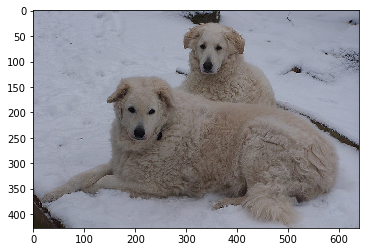

That's a dog. Breed: Kuvasz


In [20]:
from keras.applications.xception import Xception, preprocess_input

def dog_breed_classifier(img_path):
    
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
    breed = predict_breed(img_path) 
    
    if dog_detector(img_path): print("That's a dog. Breed: " + str(breed))
    elif face_detector(img_path, face_cascade): print("That's a human, but it looks like a " + str(breed))
    else: print("I can't detect anything!")

dog_breed_classifier(train_files[0])

---
<a id='step7'></a>
## Step 7: Test your Algorithm -- Dog Detector and Breed Classifier
### This algorithm accepts a file path to an image and first determines...
 - **If the image contains a human, dog, or neither, then...**
   - **if a dog is detected in the image, returns the predicted breed.**
   - **if a human is detected in the image, returns the resembling dog breed.**
   - **if neither is detected in the image, provides output that indicates an error.**

### Question 6: Ideas for Improvement
The performance on the test set is 85% which is very good. The best ways to improve the results would be: (1) augmenting data, (2) running for more epochs, (3) and building ensembles of classifiers, and (4) fine-tuning the top layers of a pre-trained network.

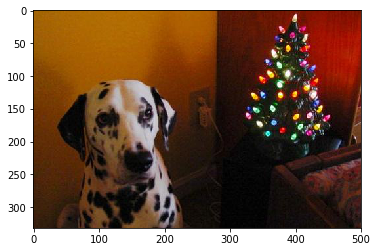

That's a dog. Breed: Dalmatian


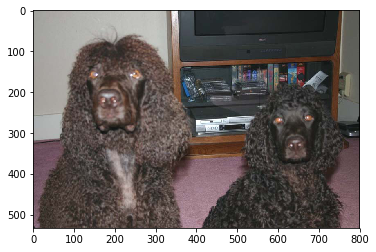

That's a dog. Breed: Irish_water_spaniel


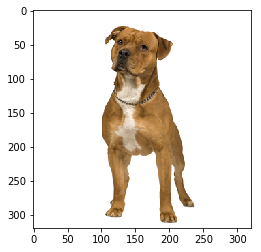

That's a dog. Breed: American_staffordshire_terrier


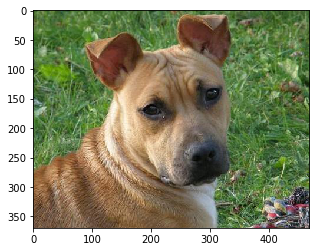

That's a dog. Breed: American_staffordshire_terrier


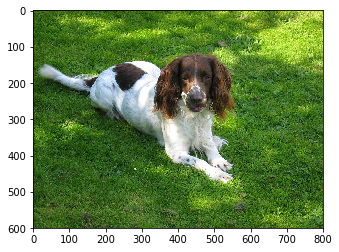

That's a dog. Breed: English_springer_spaniel


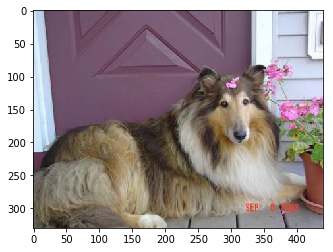

That's a dog. Breed: Collie


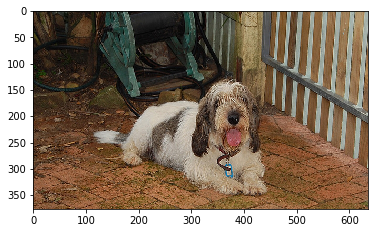

That's a dog. Breed: Petit_basset_griffon_vendeen


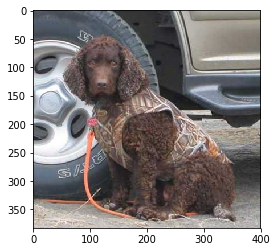

That's a dog. Breed: American_water_spaniel


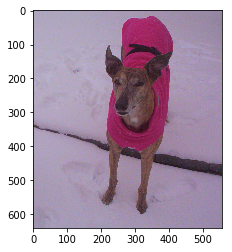

That's a dog. Breed: Greyhound


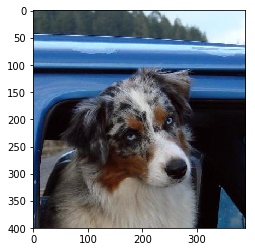

That's a dog. Breed: Australian_shepherd


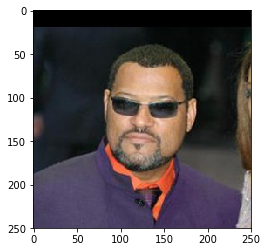

That's a human, but it looks like a Petit_basset_griffon_vendeen


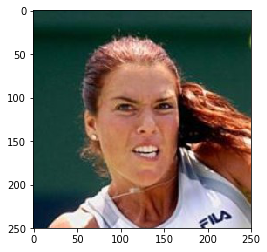

That's a human, but it looks like a Smooth_fox_terrier


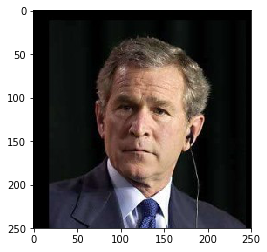

That's a human, but it looks like a Lowchen


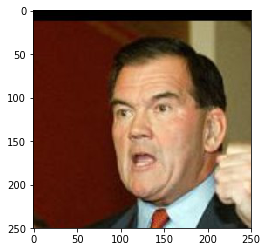

That's a human, but it looks like a Lowchen
Wall time: 3min 6s


In [21]:
%%time

#dog_breed_classifier('./image/IMG_4136.jpg')
for k in range(1,11): dog_breed_classifier(train_files[k])
for k in range(3,7): dog_breed_classifier(human_files[k])